# Minimal example for working with ergometer data

Import the worklab module:

In [1]:
import os
import worklab as wl


Import the data with com.load() or the device specific load function:

In [2]:
filename = os.getcwd()
filename = os.path.join(os.path.split(filename)[0], 'example_data', 'Esseda_example_LEM.xls')
ergo_data = wl.com.load(filename)
print("Ergometer data is stored in a: ", type(ergo_data))


Initializing loading for C:\Users\rick_\Development\worklab2\example_data\Esseda_example_LEM.xls ...
File identified as Esseda datafile. Attempting to load ...
Data loaded!

Ergometer data is stored in a:  <class 'dict'>


In [3]:
ergo_data.keys()

dict_keys(['left', 'right'])

The ergometer data is a little more simple than measurement wheel data, (but you do have two modules):

In [4]:
ergo_data["left"].head()

,time,force,speed
0,0.01,0.788487,0.0
1,0.02,0.780378,0.0
2,0.03,0.797562,0.0
3,0.04,0.792799,0.0
4,0.05,0.838543,0.0


Processing is identical however:

- filter
- process
- push-by-push

In [5]:
ergo_data = wl.kin.filter_ergo(ergo_data)
ergo_data = wl.kin.process_ergo(ergo_data)
ergo_data["left"].head()

,time,force,speed,torque,acc,power,dist,work,uforce,aspeed,angle
0,0.01,0.788493,-1.163828e-14,0.244433,-2.799567e-13,-9.176693e-15,0.000000e+00,-9.176693e-17,0.888846,-3.754282e-14,0.000000e+00
1,0.02,0.793392,-1.443784e-14,0.245951,-2.414086e-13,-1.145486e-14,-1.303806e-16,-1.145486e-16,0.894369,-4.657369e-14,-4.205825e-16
2,0.03,0.802370,-1.646645e-14,0.248735,-1.179231e-13,-1.321219e-14,-2.849020e-16,-1.321219e-16,0.904490,-5.311757e-14,-9.190388e-16
3,0.04,0.812440,-1.679630e-14,0.251857,1.148631e-13,-1.364600e-14,-4.512158e-16,-1.364600e-16,0.915842,-5.418163e-14,-1.455535e-15
4,0.05,0.811675,-1.416918e-14,0.251619,4.896777e-13,-1.150078e-14,-6.060432e-16,-1.150078e-16,0.914979,-4.570705e-14,-1.954978e-15


Now you have almost all parameters that you will ever need:

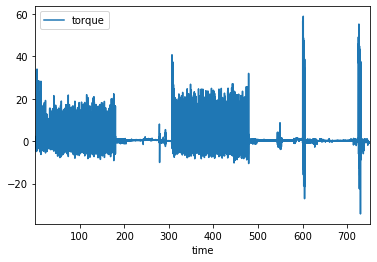

In [6]:
ergo_data["left"].plot("time", "torque");

Let's do a christmas tree for a smaller section of the data:

In [7]:
ergo_data["left"] = ergo_data["left"].iloc[:3000, :]
ergo_data["right"] = ergo_data["right"].iloc[:3000, :]

Get the pushes with the push by push function:

In [8]:
pushes = wl.kin.push_by_push_ergo(ergo_data)
print(type(pushes))
print(pushes.keys())
pushes["left"].head()

<class 'dict'>
dict_keys(['left', 'right'])


,stop,start,peak,tstart,tstop,tpeak,cangle,ptime,meanpower,maxpower,meantorque,maxtorque,meanforce,maxforce,work,slope,ctime,reltime
0,351,276,311,2.77,3.52,3.12,1.180683,0.75,34.260157,77.243329,20.808663,33.636038,75.667865,122.312864,26.037719,96.102965,1.15,65.217391
1,419,391,409,3.92,4.20,4.10,1.122666,0.28,67.705997,142.440912,16.666537,34.028533,60.605589,123.740121,19.634739,189.047406,0.77,36.363636
2,474,468,472,4.69,4.75,4.73,0.272526,0.06,15.354861,27.136431,3.381357,5.975240,12.295844,21.728147,1.074840,149.381011,0.12,50.000000
3,493,480,487,4.81,4.94,4.88,0.599194,0.13,44.567863,79.093543,9.648388,17.036661,35.085049,61.951494,6.239501,243.380868,0.60,21.666667
4,547,540,543,5.41,5.48,5.44,0.319896,0.07,31.561252,54.087009,6.901818,11.812804,25.097520,42.955650,2.524900,393.760127,0.12,58.333333


This is all very similar to the measurement wheel, except you don't have access to 3D forces. Similar to the measurement wheel data, all of the above can be achieved with the `auto_process` function.

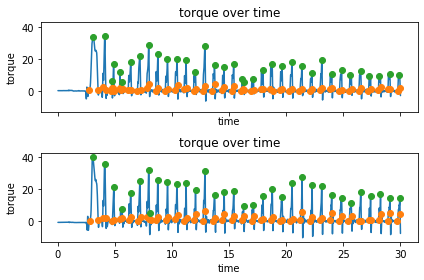

In [9]:
wl.plots.plot_ergometer_pushes(ergo_data, pushes);

Very festive! 🎄